# Performance on Ethical Supervised Learning with FICO Scores

<hr/>

## Overview:
- Measuring performance of supervised learning predictors that are:
    - classification problems
    - binary predictors
- Introduction to non-discriminatory supervised learning predictors
- Charting performance of a FICO score case study to determine if it passes as non-discriminatory

<hr/>

## Part 1: Measuring Performance on Binary Classifiers
While are many ways to calculate the performance of a binary predictor, two methods are particularly useful when combined:
<ul>
<li><i>Precision</i>:
<br/> - Among the 1's we predict, how many were actually 1?
</li>
<li><i>Recall</i>:
<br/> - Among all of the actual 1's, what percentage did we predict were 1?
</li>
</ul>

<hr/>

## Part 2: A Brief Introduction to Non-Discriminatory Machine Learning Predictors
For companies that use classification based predictors, sometimes the predicted outcome of individuals within a group will fully influence the decision that is made for that individual. This needs to be treated particularly carefully when the decision being made is a <i>Social Benefit</i> - ie) health care, loan approval, or college admission. What if the data that is being used to train the model is inherently discriminatory? What if factors that created the data we use was inherently discriminatory and we didn't even know? Then the outcome predicted would also be discriminatory.<br/><br/>
This is what non-discriminatory predictors seek to solve. While there are many models to use, we will be focusing on <b>The Equal Opportunity Model</b>. This means, for each group - the true positive rate is the same. What does this mean in terms of performance for binary classifiers? (Write in terms of 1's an 0's below)

** Write Answer Here: **

<hr/>

## Part 3: Introducing the FICO Dataset
For this tutorial, we will be working with a dataset that represents the distribution of FICO scores for non-defaulters (people who have previously paid off their loans on time) against four main demographic groups: Asian, Hispanic, Black, and White. Go ahead and import this data to take a look. What collected information to create FICO scores could be inherently discriminatory?

In [5]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
white_non_default = pd.read_csv("white-non-default.csv")
asian_non_default = pd.read_csv("asian-non-default.csv")
black_non_default = pd.read_csv("black-non-default.csv")
hispanic_non_default = pd.read_csv("hispanic-non-default.csv")

For loan approval, usually a bank will set a <b>threshold FICO score</b> that determines who is approved and who is denied. For example, if the threshold was 650: everyone with a FICO score below 650 would be denied the loan, and everyone with a FICO score above 650 would be approved a loan.
Theoretically, with equal-opportunity the probability of a non-defaulter getting approved a loan ($\hat Y$ = 1) at any threshold FICO score should be the same amongst all four groups. Finish the function below to plot the distribution of non-defaulters from one group getting ($\hat Y$ = 1) based on a threshold value of FICO scores. Then, get the probabilities for all four demographic groups and plot them on top of eachother.

In [6]:
def getGraphData(dataset, metricName, graphType):
    i= 0
    x = []
    y = []
    while(i < 100.5):
        # our dataset doesn't include these scores so this line is necessary
        if(i == 72.5 or i == 77.5 or i == 92.5):
            i = (i + 0.5)
        # create and append the x and y values to the x and y arrays to be returned for the plot here:
        curr_race_non_default = dataset[dataset["Score"] >= i][metricName].sum()
        total_race_non_default = dataset[metricName].sum()
        yVal = curr_race_non_default / total_race_non_default
        x.append(i)
        y.append(yVal)
        i = (i + 0.5)
    plt.plot(x, y, graphType, label=metricName)

** Plot Graph Below **

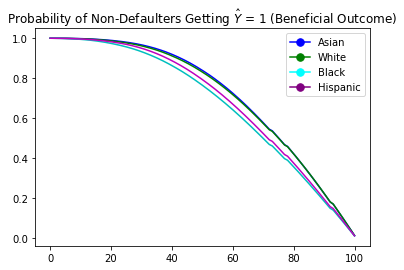

In [7]:
getGraphData(asian_non_default, "Asian (Good)", 'b-')
getGraphData(white_non_default, "Non- Hispanic white (Good)", 'g-')
getGraphData(black_non_default, "Black (Good)", 'c-')
getGraphData(hispanic_non_default, "Hispanic (Good)", 'm-')
plt.title("Probability of Non-Defaulters Getting $\hat Y$ = 1 (Beneficial Outcome)" )

blue_line = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=15, label='Asian')
green_line = mlines.Line2D([], [], color='green', marker='.',
                          markersize=15, label='White')
cyan_line = mlines.Line2D([], [], color='cyan', marker='.',
                          markersize=15, label='Black')
purple_line = mlines.Line2D([], [], color='purple', marker='.',
                          markersize=15, label='Hispanic')

plt.legend(handles=[blue_line, green_line, cyan_line, purple_line])

** Calculating Precision and Recall **<br/>
Now that we've seen the likelihood of non-defaulting individuals from each of the four demographic groups to be approved a loan based on threshold value, let's check the performance of this model. First, we need to import the distribution of FICO scores for <i>defaulters</i> (people who don't historically pay loans on time) of these four groups.

In [9]:
white_default = pd.read_csv("white-default.csv")
asian_default = pd.read_csv("asian-default.csv")
black_default = pd.read_csv("black-default.csv")
hispanic_default = pd.read_csv("hispanic-default.csv")

In [11]:
white_default.head()

,Unnamed: 0,Score,Non- Hispanic white (Bad)
0,0,0.0,0.17
1,1,0.5,1.85
2,2,1.0,7.26
3,3,1.5,8.85
4,4,2.0,10.58


Create a pandas dataframe that includes all four groups (defaulting and non-defaulting) and transRisk scores. With each score acting as the <i>threshold</i> value, for each group - determine the precision score and the recall score for that threshold. Are there any significant discrepancies you notice between groups?

In [21]:
merged = white_default.merge(asian_default, on="Score").merge(black_default, on="Score").merge(hispanic_default, on="Score").merge(white_non_default, on="Score").merge(asian_non_default, on="Score").merge(black_non_default, on="Score").merge(hispanic_non_default, on="Score")
totalData = merged[["Score", "Non- Hispanic white (Bad)", "Asian (Bad)", "Black (Bad)", "Hispanic (Bad)", "Non- Hispanic white (Good)", "Asian (Good)", "Black (Good)", "Hispanic (Good)"]]
totalData

,Score,Non- Hispanic white (Bad),Asian (Bad),Black (Bad),Hispanic (Bad),Non- Hispanic white (Good),Asian (Good),Black (Good),Hispanic (Good)
0,0.0,0.17,0.08,0.11,0.08,0.00,0.00,0.02,0.00
1,0.5,1.85,1.81,2.17,1.88,0.03,0.01,0.10,0.04
2,1.0,7.26,7.69,8.75,7.85,0.22,0.19,0.74,0.45
3,1.5,8.85,9.20,10.75,9.40,0.26,0.21,0.87,0.51
4,2.0,10.58,10.50,13.25,11.85,0.35,0.28,1.06,0.66
5,2.5,12.24,11.78,15.33,13.54,0.44,0.36,1.33,0.83
6,3.0,14.11,13.41,17.72,16.31,0.59,0.49,1.71,1.09
7,3.5,15.85,15.22,19.88,17.90,0.69,0.57,2.02,1.28
8,4.0,17.27,16.34,22.02,19.88,0.80,0.64,2.31,1.51
9,4.5,17.81,17.23,22.71,20.65,0.84,0.67,2.47,1.60


<hr/>
## Conclusion

As our research shows, it is very obvious that the data involved in creating the supervised learning predictors for loan approval from FICO scores is inherently discriminatory. What are some other possible solutions for optimizing performance of these models to ensure non-discriminatory decision making? 
<br/><br/>
FICO data and non-discriminatory analysis courtesy of https://arxiv.org/pdf/1610.02413.pdf